In [17]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram, array_to_latex

In [41]:
# initialize equal superposition
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    qc.h(qubits)
    return qc

# implement an oracle
def add_oracle(qc, qubits):
    # example oracle
    qc.cz(0,1) 
    qc.cz(0,2)
    qc.x(1)
    qc.cz(1,3)
    return qc

# implement diffuser
def add_diffuser(qc, qubits):
    # |s> -> |00..0>
    qc.h(range(n))
    # |00..0> -> |11..1>
    qc.x(range(n))
    # Do multi-controlled-Z gate
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)  # multi-controlled-toffoli
    qc.h(n-1)
    # |11..1> -> |00..0>
    qc.x(range(n))
    # |00..0> -> |s>
    qc.h(range(n))
    # return diffuser
    return qc

Number of Grover iterations required is given by equation (6.15) in Nielsen & Chuang:
\begin{equation}
R = {\rm CI} \left( \frac{\arccos \sqrt{M/N}}\theta \right)
\end{equation}
where ${\rm CI}(x)$ denotes the integer closest to the real number $x$, where by convention we round halves down e.g. ${\rm CI}(3.5) = 3$.

In [ ]:
# compute number of Grover iterations
def calculate_repetitions(N, M):
    sMN = np.sqrt(M/N)
    theta = 2 * np.arcsin(sMN)
    number = np.arccos(sMN/theta)
    # implement round plzzzzzzzzzzzzz
    return number

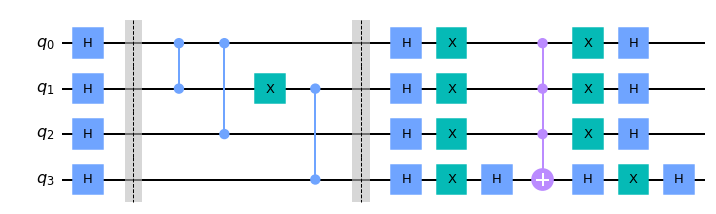

In [42]:
# choose circuit size
n = 4
qc = QuantumCircuit(n)

qc = initialize_s(qc, range(n))
qc.barrier()
qc = add_oracle(qc, range(n))
qc.barrier()
qc = add_diffuser(qc, range(n))
qc.draw('mpl')

In [43]:
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(qc).result()
statevec = result.get_statevector()
array_to_latex(statevec)

<IPython.core.display.Latex object>

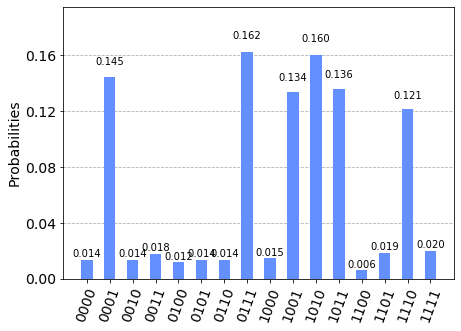

In [44]:
qc.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)